In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917


# Árvore de Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00244998 -0.00195892 -0.00205539 -0.00228629 -0.00145916 -0.00220708
 -0.0024888  -0.00152942 -0.00190686 -0.00217296] 

O erro quadrático médio foi: 0.001720
O erro quadrático total foi: 2.488422
O maior erro por previsão foi: 0.366354
O erro relativo foi 8.404593%

Error for the time series sample:
O erro quadrático médio foi: 0.008460
O erro quadrático total foi: 2.389655
O maior erro por previsão foi: 0.605921
O erro relativo foi 18.018074%


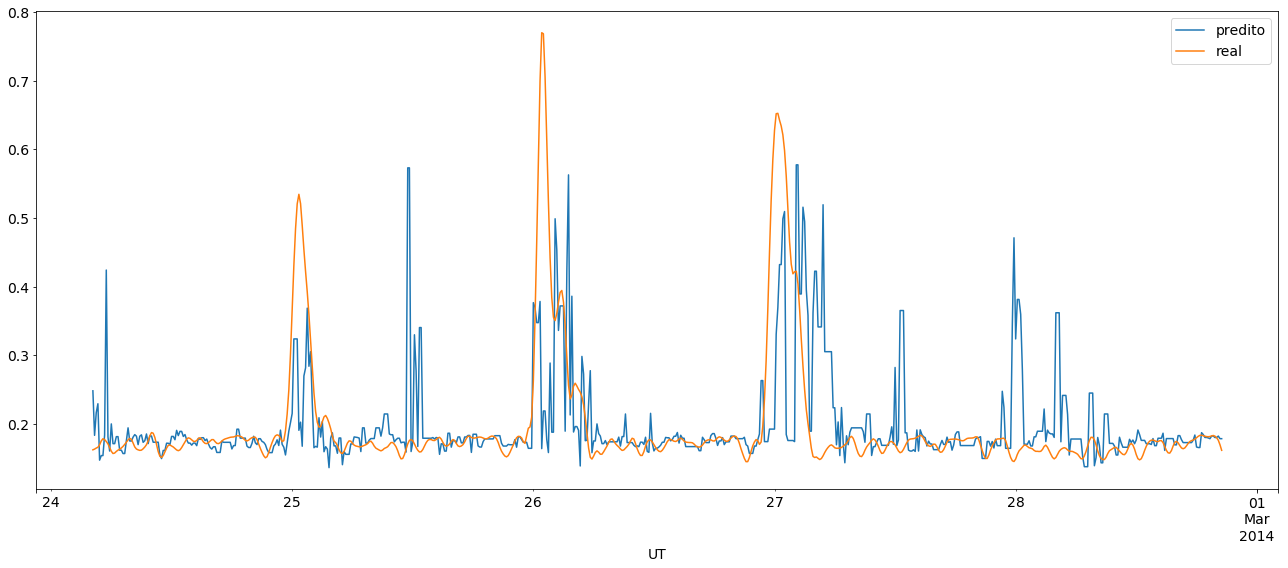

In [5]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predito'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predito'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(18, 8));
plt.xlabel('UT')
plt.tight_layout()
plt.savefig('./images/regression_cart.eps', format='eps', dpi=1000)

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00204386 -0.00292982 -0.002699   -0.00269674 -0.00309647 -0.00256497
 -0.0026705  -0.00208722 -0.00288607 -0.00259   ] 

O erro quadrático médio foi: 0.002274
O erro quadrático total foi: 2.861127
O maior erro por previsão foi: 0.359117
O erro relativo foi 10.703308%

Error for the time series sample:
O erro quadrático médio foi: 0.007793
O erro quadrático total foi: 2.293479
O maior erro por previsão foi: 0.626911
O erro relativo foi 19.259925%


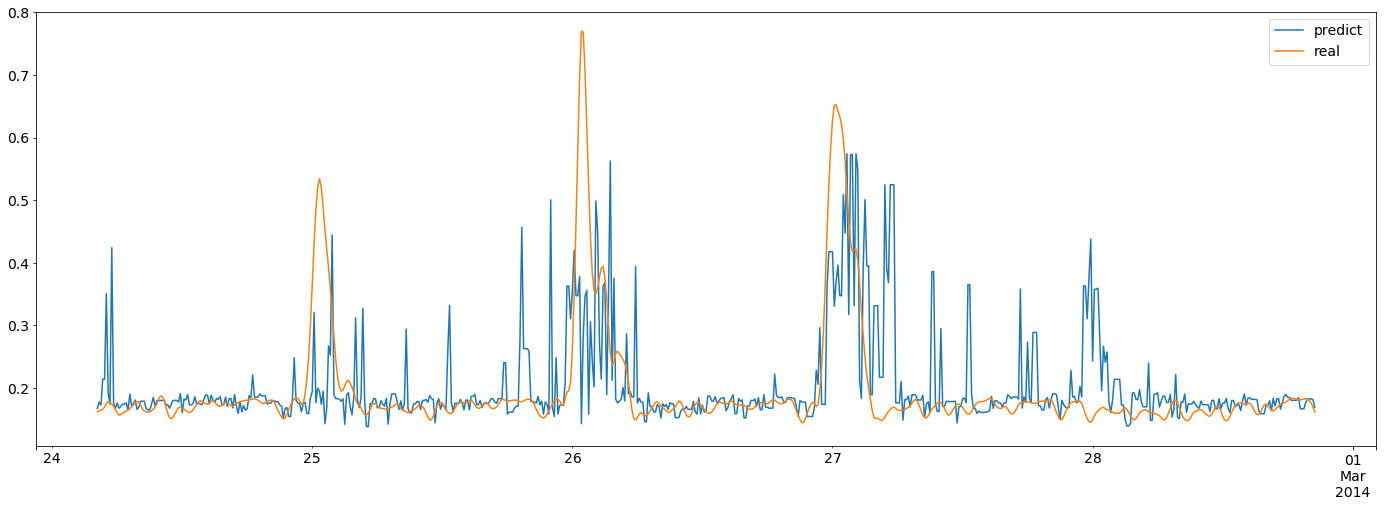

In [7]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00273553 -0.00219603 -0.00209125 -0.00194299 -0.00178741 -0.00179716
 -0.00262355 -0.00183633 -0.00204303 -0.00196411] 

O erro quadrático médio foi: 0.001703
O erro quadrático total foi: 2.476027
O maior erro por previsão foi: 0.364188
O erro relativo foi 8.933772%

Error for the time series sample:
O erro quadrático médio foi: 0.006528
O erro quadrático total foi: 2.099137
O maior erro por previsão foi: 0.438307
O erro relativo foi 15.961202%


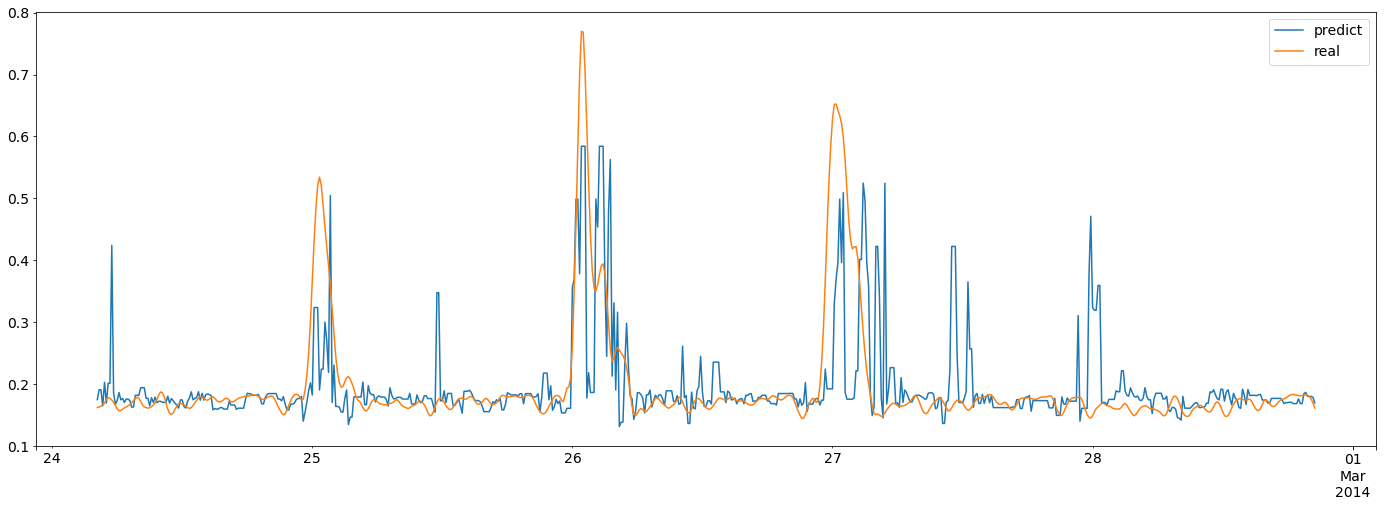

In [9]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00235269 -0.00184838 -0.00214258 -0.0025918  -0.00195081 -0.00198106
 -0.0017657  -0.0019013  -0.0017067  -0.00199611] 

O erro quadrático médio foi: 0.001909
O erro quadrático total foi: 2.621380
O maior erro por previsão foi: 0.387979
O erro relativo foi 8.757065%

Error for the time series sample:
O erro quadrático médio foi: 0.006548
O erro quadrático total foi: 2.102329
O maior erro por previsão foi: 0.515818
O erro relativo foi 16.300475%


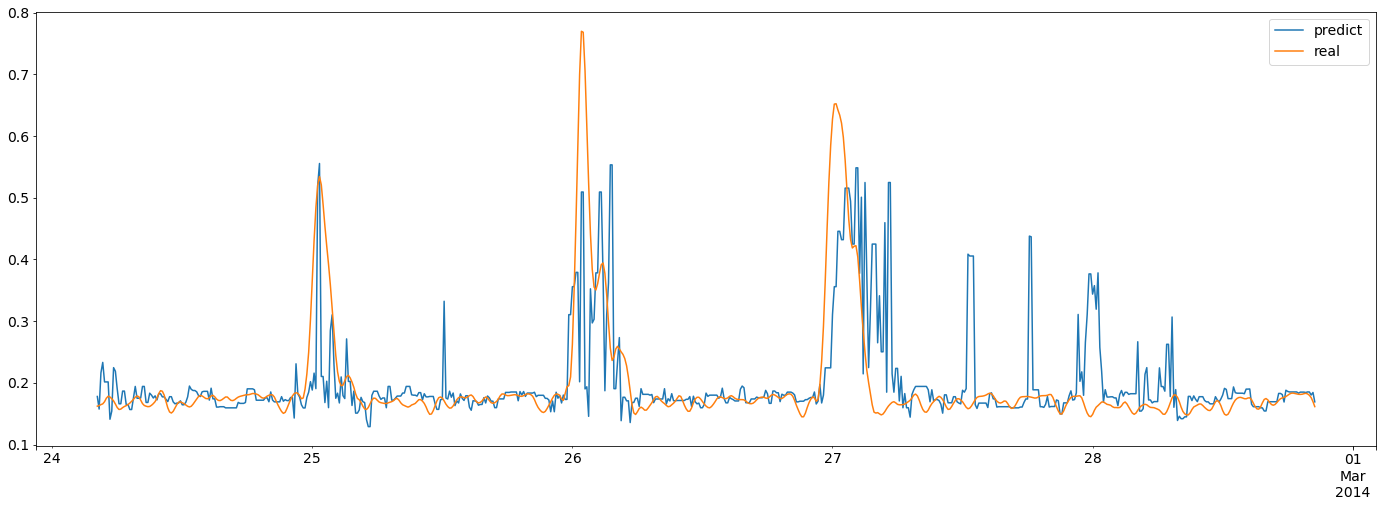

In [11]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00211798 -0.00213724 -0.00243537 -0.00243019 -0.00211194 -0.00227208
 -0.00183013 -0.00226054 -0.00225323 -0.00214135] 

O erro quadrático médio foi: 0.002030
O erro quadrático total foi: 2.703612
O maior erro por previsão foi: 0.414523
O erro relativo foi 9.313458%

Error for the time series sample:
O erro quadrático médio foi: 0.007987
O erro quadrático total foi: 2.321878
O maior erro por previsão foi: 0.539783
O erro relativo foi 16.491272%


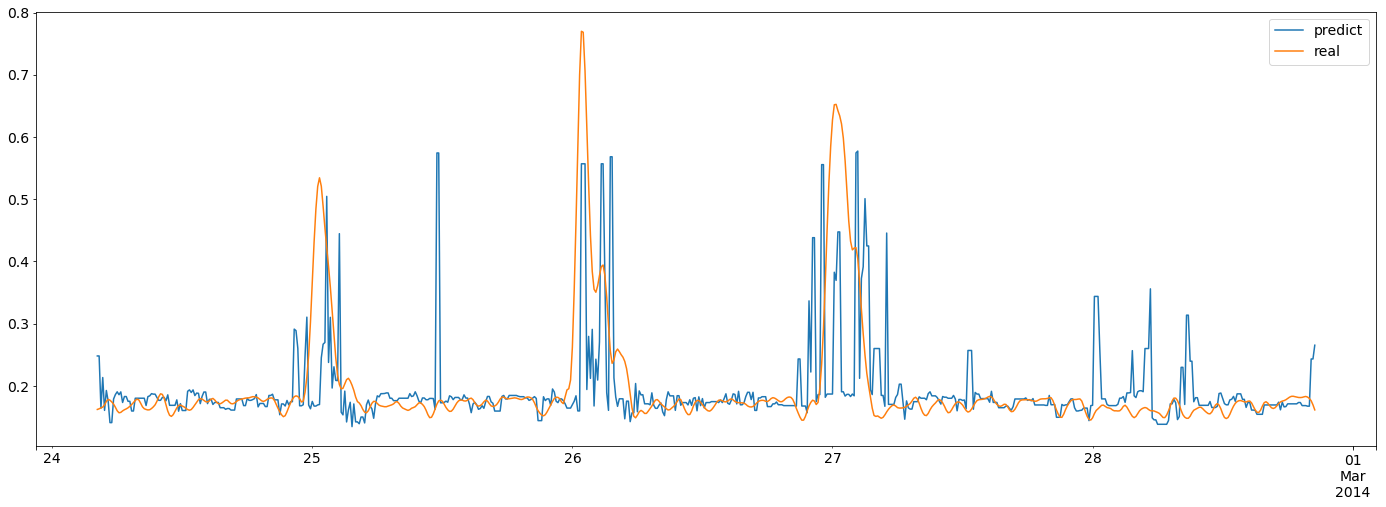

In [13]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00188145 -0.00172799 -0.00181817 -0.00236068 -0.00224808 -0.00236267
 -0.00231879 -0.00160378 -0.00233278 -0.00174491] 

O erro quadrático médio foi: 0.001920
O erro quadrático total foi: 2.629197
O maior erro por previsão foi: 0.384199
O erro relativo foi 8.810384%

Error for the time series sample:
O erro quadrático médio foi: 0.007793
O erro quadrático total foi: 2.293483
O maior erro por previsão foi: 0.594008
O erro relativo foi 15.453796%


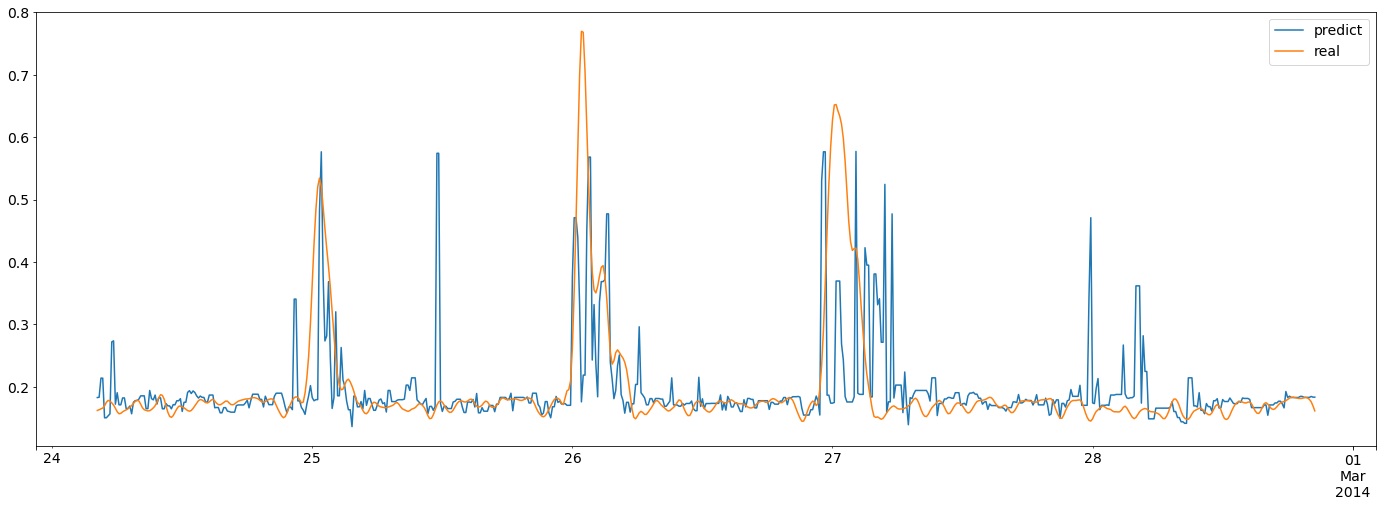

In [15]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00239046 -0.00198045 -0.00180522 -0.00294206 -0.0021461  -0.00346103
 -0.00278246 -0.00219298 -0.00231204 -0.00261978] 

O erro quadrático médio foi: 0.002286
O erro quadrático total foi: 2.868622
O maior erro por previsão foi: 0.393690
O erro relativo foi 10.107221%

Error for the time series sample:
O erro quadrático médio foi: 0.009186
O erro quadrático total foi: 2.490117
O maior erro por previsão foi: 0.612082
O erro relativo foi 18.704925%


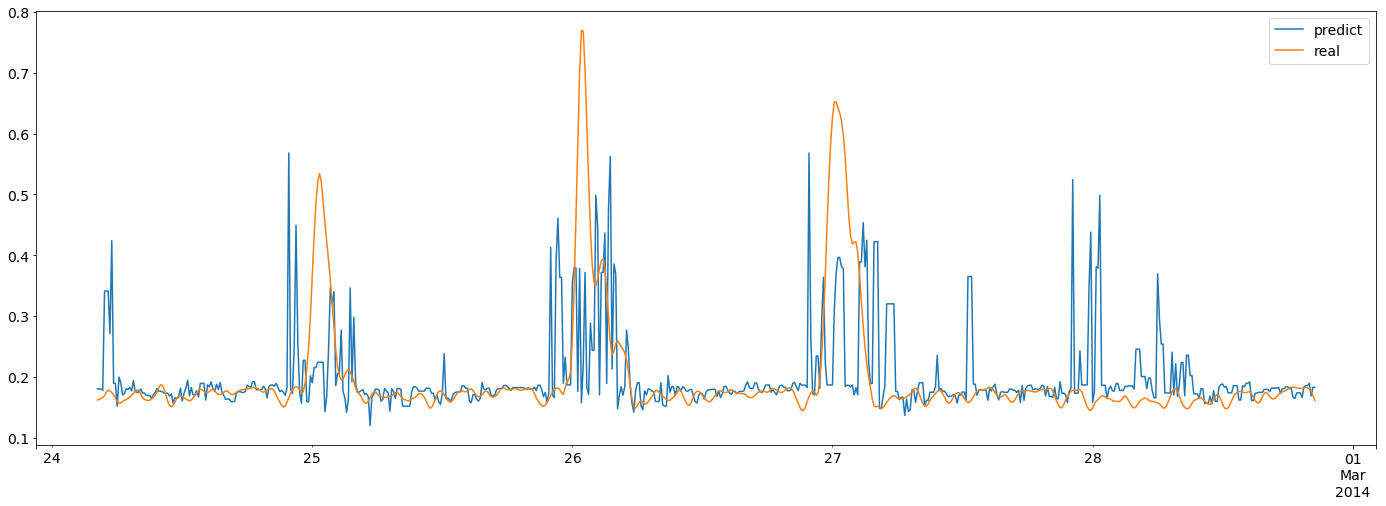

In [17]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00214607 -0.00163146 -0.00226344 -0.0021441  -0.00218719 -0.00230219
 -0.00214139 -0.00187763 -0.00188766 -0.00182461] 

O erro quadrático médio foi: 0.002011
O erro quadrático total foi: 2.690691
O maior erro por previsão foi: 0.393421
O erro relativo foi 8.936095%

Error for the time series sample:
O erro quadrático médio foi: 0.008400
O erro quadrático total foi: 2.381174
O maior erro por previsão foi: 0.598193
O erro relativo foi 17.412732%


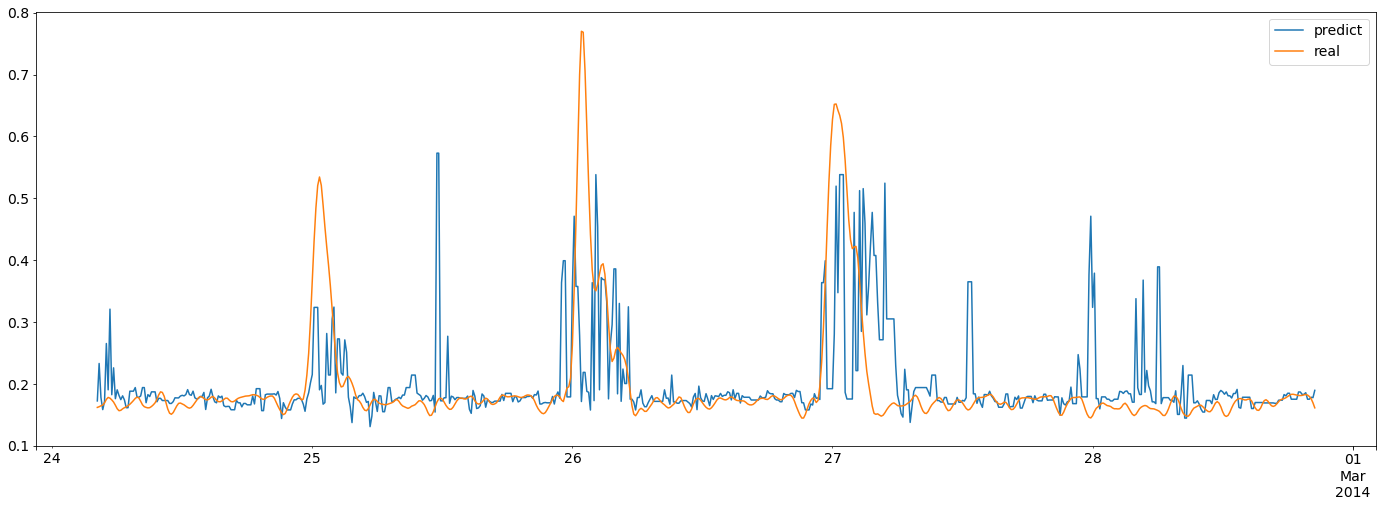

In [19]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));